In [4]:
#Mengimport semua library yang di butuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#Mencek Versi Tensorflow
print(tf.__version__)

2.2.0


In [5]:
#Mempersiapkan Data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-07-05 12:02:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  8.36MB/s    in 11s     

2020-07-05 12:03:06 (5.88 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [6]:
#Melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
#Mendefinisikan nama direktori untuk data latih dan data validasi.
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [7]:
#Terdapat Sub Direktori
#sub-direktori ‘clean’ terdapat gambar-gambar ruangan yang rapi dan pada sub-direktori ‘messy’ terdapat gambar-gambar ruangan yang berantakan
os.listdir('/tmp/images/train')

['clean', 'messy']

In [8]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [11]:
#Membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

#Membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

#Membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

#Membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [12]:
#Membuat sebuah objek ImageDataGenerator untuk data training dan data testing
#Image data generator adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model
#Kemudahan image data generator adalah, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar
#Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset
#Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada
#Contoh augmentasi gambar adalah horizontal flip di mana gambar akan dibalikkan secara horizontal
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [13]:
#Menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [15]:
#Ketika data siap, selanjutnya membangun arsitektur sebuah CNN
#Terdapatnya 2 lapis layer konvolusi dan max pooling
#Fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar
#Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
#Memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
#Melatih model kita menggunakan metode fit
#Menggunakan image data generator, kita tidak perlu memasukkan parameter gambar dan labelnya
#Image data generator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan
#Contohnya sebuah gambar yang terdapat di direktori clean, secara otomatis akan diberi label “clean” oleh image data generator 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 1s - loss: 0.4895 - accuracy: 0.7800 - val_loss: 0.3633 - val_accuracy: 0.9500
Epoch 2/20
25/25 - 1s - loss: 0.4517 - accuracy: 0.8400 - val_loss: 0.4119 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 1s - loss: 0.4967 - accuracy: 0.7700 - val_loss: 0.3450 - val_accuracy: 0.8000
Epoch 4/20
25/25 - 1s - loss: 0.4619 - accuracy: 0.8000 - val_loss: 0.3864 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 1s - loss: 0.5532 - accuracy: 0.7500 - val_loss: 0.5462 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 1s - loss: 0.6090 - accuracy: 0.5900 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 1s - loss: 0.5231 - accuracy: 0.7600 - val_loss: 0.4068 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 1s - loss: 0.3796 - accuracy: 0.8500 - val_loss: 0.2958 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 1s - loss: 0.5079 - accuracy: 0.7900 - val_loss: 0.4622 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 1s - loss: 0.5001 - accuracy: 0.7400 - val_loss: 0.4296 - val_accuracy: 0.8500
Epoch 11/20
25/25 -

Using TensorFlow backend.


Saving iStock-873941944.jpg to iStock-873941944.jpg
iStock-873941944.jpg
clean


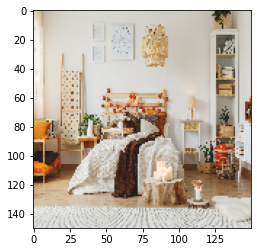

In [22]:
#Kode di bawah memungkinkan kita untuk secara interaktif memilih sebuah berkas gambar
#Kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')